# **Libraries and Dataset**

In [1]:
import numpy as np
import pandas as pd
import seaborn  as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso

c:\Users\Asus\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
dataset = pd.read_csv('data/data_market.csv', encoding='latin1')


In [3]:
dataset.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [4]:
dataset = pd.DataFrame(dataset)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [6]:
print(dataset.isnull().any())

Order ID         False
Customer Name    False
Category         False
Sub Category     False
City             False
Order Date       False
Region           False
Sales            False
Discount         False
Profit           False
State            False
dtype: bool


In [7]:
dataset.drop((dataset[dataset['Region']=='North']).index, inplace=True)
region = pd.pivot_table(data=dataset, index='Region', values=['Order ID', 'Sales'], 
               aggfunc = {'Order ID':'count', 'Sales':'sum'}).reset_index().sort_values(by='Sales', ascending=False)
region

,Region,Order ID,Sales
3,West,3203,4798743
1,East,2848,4248368
0,Central,2323,3468156
2,South,1619,2440461


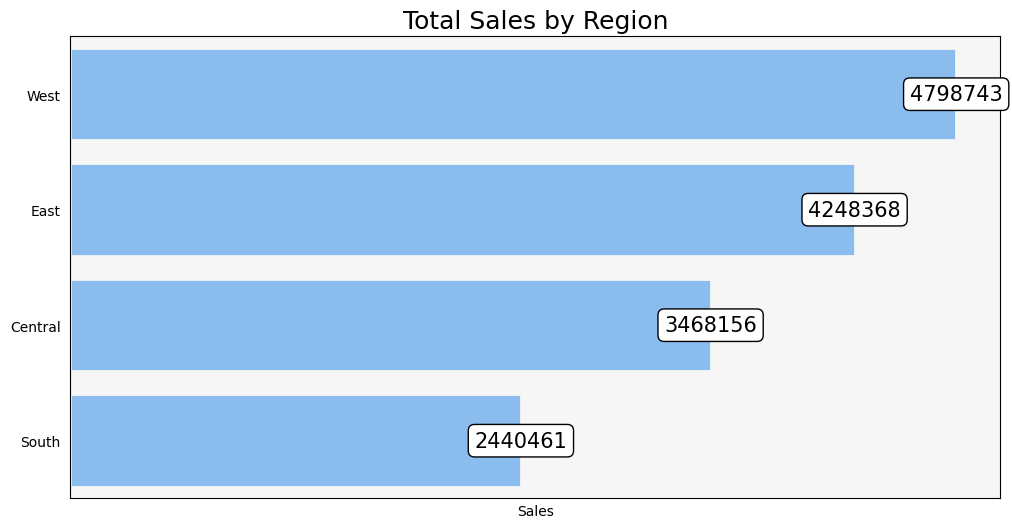

In [8]:
plt.rcParams['figure.figsize'] = (12,6)
ax = plt.axes()
ax.set_facecolor('#F6F6F6')
sns.barplot(y='Region', x='Sales', data=region, color='#79BEFD', linewidth=2, edgecolor='#F6F6F6')

bbox_args = dict(boxstyle = 'round', fc = '1')
for p in ax.patches:
    width = p.get_width()
    plt.text(p.get_width(), p.get_y() + 0.5 * p.get_height(), '{:1.0f}'.format(width), 
             ha = 'center', 
             va = 'center', 
             color = 'black', 
             bbox = bbox_args, 
             fontsize = 15)

plt.title('Total Sales by Region', fontsize = 18)
plt.tick_params(left=False, bottom=False, labelbottom=False)
plt.ylabel(None)

plt.show()

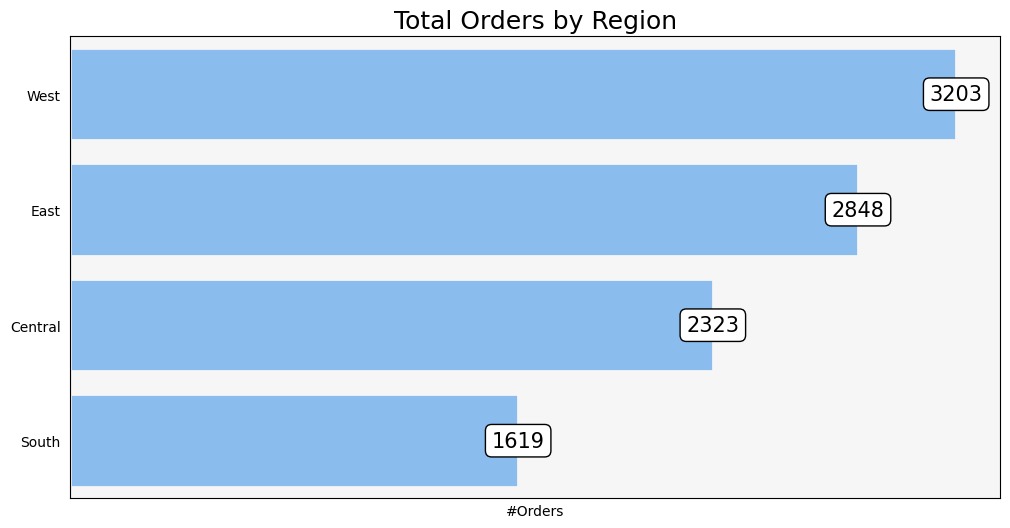

In [9]:
plt.rcParams['figure.figsize'] = (12,6)
ax = plt.axes()
ax.set_facecolor('#F6F6F6')
sns.barplot(y='Region', x='Order ID', data=region, color='#79BEFD', linewidth=2, edgecolor='#F6F6F6')

bbox_args = dict(boxstyle = 'round', fc = '1')
for p in ax.patches:
    width = p.get_width()
    plt.text(p.get_width(), p.get_y() + 0.5 * p.get_height(), '{:1.0f}'.format(width), 
             ha = 'center', 
             va = 'center', 
             color = 'black', 
             bbox = bbox_args, 
             fontsize = 15)

plt.title('Total Orders by Region', fontsize = 18)
plt.tick_params(left=False, bottom=False, labelbottom=False)
plt.xlabel('#Orders')
plt.ylabel(None)

plt.show()

In [10]:
category_sales = pd.pivot_table(data=dataset, index=['Category', 'Sub Category'], values='Sales', 
               aggfunc='sum').reset_index().sort_values(['Category', 'Sales'], ascending=False)
category_sales

,Category,Sub Category,Sales
21,Snacks,Cookies,768213
22,Snacks,Noodles,735435
20,Snacks,Chocolates,733898
18,Oil & Masala,Masalas,696226
19,Oil & Masala,Spices,672876
17,Oil & Masala,Edible Oil & Ghee,668086
13,Fruits & Veggies,Fresh Fruits,551212
14,Fruits & Veggies,Fresh Vegetables,525842
16,Fruits & Veggies,Organic Vegetables,520271
15,Fruits & Veggies,Organic Fruits,503402


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

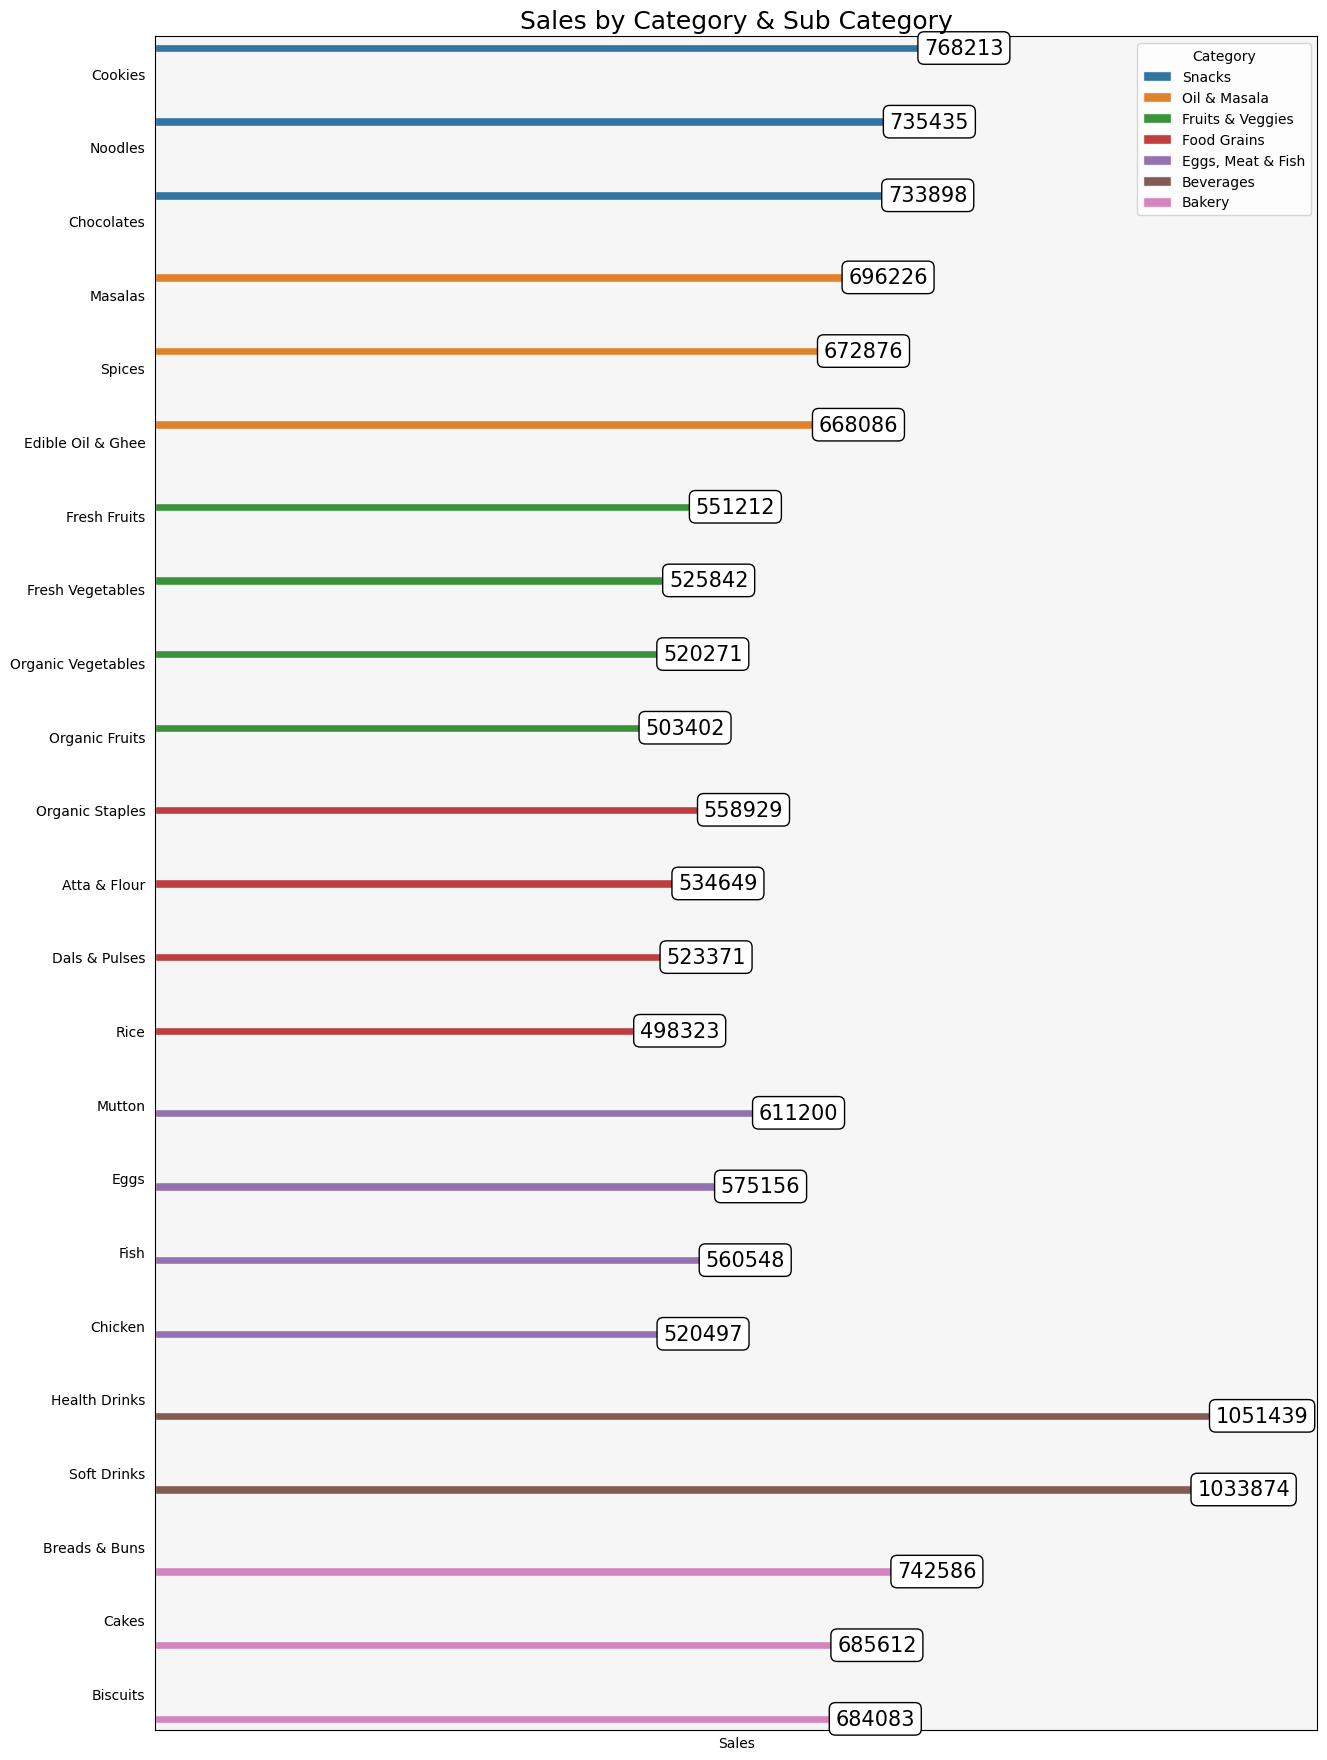

In [11]:
plt.rcParams['figure.figsize'] = (15,22)
ax = plt.axes()
ax.set_facecolor('#F6F6F6')
sns.barplot(y='Sub Category', x='Sales', data=category_sales, hue='Category', linewidth=1, edgecolor='#F6F6F6')

bbox_args = dict(boxstyle = 'round', fc = '1')
for p in ax.patches:
    width = p.get_width()
    plt.text(p.get_width(), p.get_y() + 0.5 * p.get_height(), '{:1.0f}'.format(width), 
             ha = 'center', 
             va = 'center', 
             color = 'black', 
             bbox = bbox_args, 
             fontsize = 15)

plt.title('Sales by Category & Sub Category', fontsize = 18)
plt.ylabel(None)
plt.tick_params(left=False, bottom=False, labelbottom=False)
plt.show()

In [12]:
profit = pd.pivot_table(data=dataset, index='Sub Category', values=['Sales', 'Profit','Discount',], aggfunc='sum').reset_index()
profit['Profit Margin'] = round((profit['Profit']/profit['Sales']) * 100,2)
profit.sort_values(by='Profit Margin', ascending=False, inplace = True)
profit

,Sub Category,Discount,Profit,Sales,Profit Margin
16,Noodles,109.86,193685.81,735435,26.34
10,Fish,84.92,147248.01,560548,26.27
17,Organic Fruits,78.81,130862.33,503402,26.00
18,Organic Staples,86.02,144136.89,558929,25.79
2,Breads & Buns,113.70,190764.98,742586,25.69
19,Organic Vegetables,81.37,133596.37,520271,25.68
20,Rice,75.54,126932.36,498323,25.47
13,Health Drinks,166.49,267469.79,1051439,25.44
8,Edible Oil & Ghee,103.51,168593.58,668086,25.24
9,Eggs,85.69,144669.92,575156,25.15


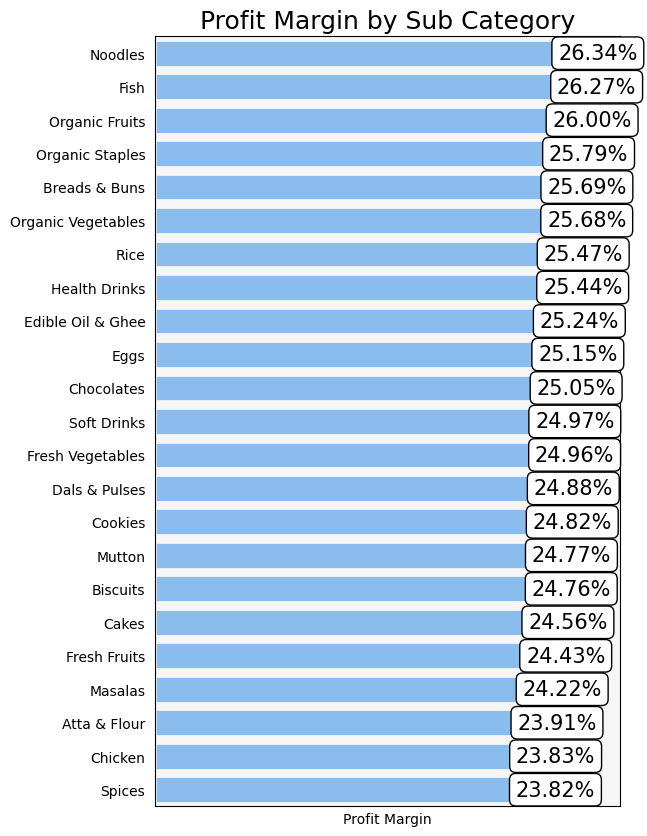

In [13]:
plt.rcParams['figure.figsize'] = (6,10)
ax = plt.axes()
ax.set_facecolor('#F6F6F6')
sns.barplot(y='Sub Category', x='Profit Margin', data=profit, color='#79BEFD', linewidth=2, edgecolor='#F6F6F6')

bbox_args = dict(boxstyle = 'round', fc = '1')
for p in ax.patches:
    width = p.get_width()
    plt.text(p.get_width(), p.get_y() + 0.5 * p.get_height(), '{:1.2f}%'.format(width), 
             ha = 'center', 
             va = 'center', 
             color = 'black', 
             bbox = bbox_args, 
             fontsize = 15)

plt.title('Profit Margin by Sub Category', fontsize = 18)
plt.tick_params(left=False, bottom=False, labelbottom=False)
plt.ylabel(None)

plt.show()

# **Split Data and Encoder**

In [14]:
# X = dataset.drop(['Order ID','Cluster','Discount','Sales','profit_margin','Profit','Sub Category','State'],axis=1)
X = profit.drop(['Profit',],axis=1)
y = profit['Profit']

In [15]:
X.head()

,Sub Category,Discount,Sales,Profit Margin
16,Noodles,109.86,735435,26.34
10,Fish,84.92,560548,26.27
17,Organic Fruits,78.81,503402,26.00
18,Organic Staples,86.02,558929,25.79
2,Breads & Buns,113.70,742586,25.69


In [16]:
columns_used = X.columns

In [17]:
def is_numeric_column(column):
    try:
        pd.to_numeric(column)
        return False
    except ValueError:
        return True

encoder=LabelEncoder()
for col in columns_used :
    if is_numeric_column(X[col]):
        X[col] = encoder.fit_transform(X[col])

X.head()

,Sub Category,Discount,Sales,Profit Margin
16,16,109.86,735435,26.34
10,10,84.92,560548,26.27
17,17,78.81,503402,26.00
18,18,86.02,558929,25.79
2,2,113.70,742586,25.69


In [18]:
y = encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<AxesSubplot:>

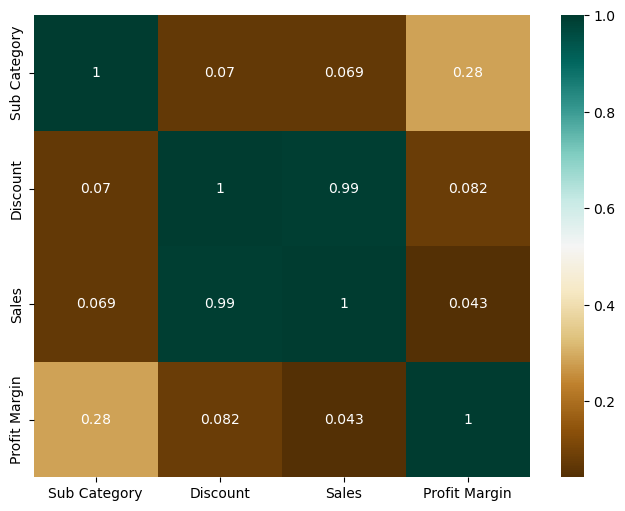

In [19]:
plt.figure(figsize=(8, 6))
heatcol = X.corr()
sns.heatmap(heatcol,cmap="BrBG",annot=True)

<AxesSubplot:>

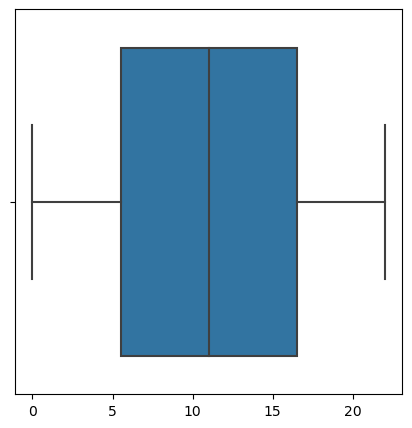

In [20]:
plt.figure(figsize=(5, 5))
sns.boxplot(x=y)

<AxesSubplot:ylabel='Count'>

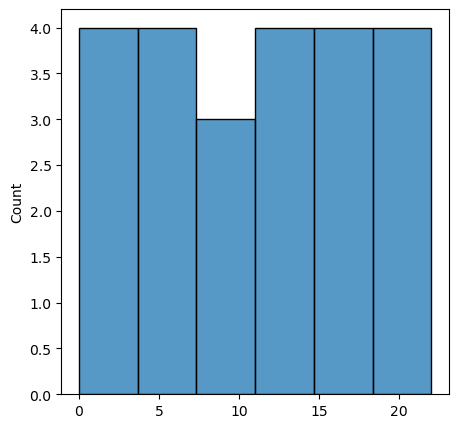

In [21]:
plt.figure(figsize=(5, 5))
sns.histplot(y)

In [22]:
# Dimension of Train and Test set
print("Dimension of Train set",X_train.shape)
print("Dimension of Test set",X_test.shape,"\n")

num_cols = X_train._get_numeric_data().columns
print("Number of numeric features:",num_cols.size)

Dimension of Train set (18, 4)
Dimension of Test set (5, 4) 

Number of numeric features: 4


# **SVM**

In [23]:
svm_model = SVR(epsilon=0.001, C=70)
svm_model.fit(X_train, y_train)

Y_pred = svm_model.predict(X_test)

In [26]:
import joblib
joblib.dump(svm_model, 'model/svr_model.pkl')

['model/svr_model.pkl']

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Calculate MAE and MSE
mae = mean_absolute_error(y_test, Y_pred)
mse = mean_squared_error(y_test, Y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)

Mean Absolute Error: 1.295875914580165
Mean Squared Error: 2.6352176160492236


In [28]:
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, Y_pred)
print("accuracy : ", r_squared)

accuracy :  0.8095941028866168


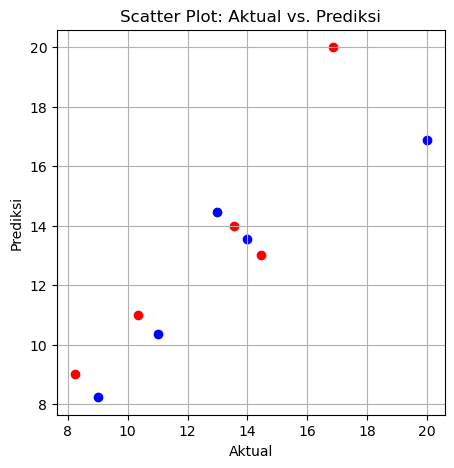

In [29]:
plt.figure(figsize=(5, 5))
plt.scatter(y_test, Y_pred, c='blue', label='Actual', marker='o')
plt.scatter(Y_pred, y_test, c='red', label='Predicted', marker='o')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Scatter Plot: Aktual vs. Prediksi")
plt.xlabel("Aktual")
plt.ylabel("Prediksi")
plt.grid(True)
plt.show()


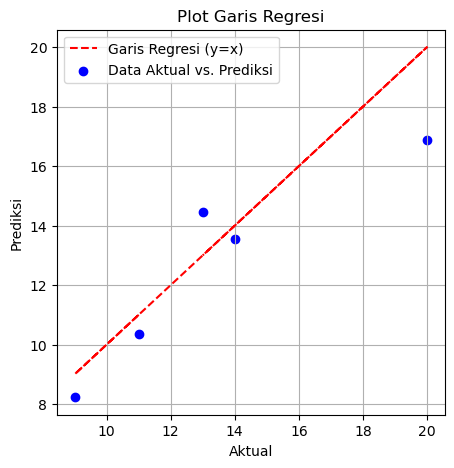

In [30]:
plt.figure(figsize=(5, 5))
plt.plot(y_test, y_test, 'r--', label="Garis Regresi (y=x)")
plt.scatter(y_test, Y_pred, c='blue', label="Data Aktual vs. Prediksi")
plt.title("Plot Garis Regresi")
plt.xlabel("Aktual")
plt.ylabel("Prediksi")
plt.legend()
plt.grid(True)
plt.show()